## USA-Washington Home Price Prediction

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

**Load the washington house dataset into dataframe**

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Load washington city zipcode dataset into dataframe**

The house data set only contains zipcode of the house and not the name of the city. So we can use another dataset that contains zipcode and city name of washington state

In [5]:
df_city = pd.read_csv('locations_zipcode.csv', usecols=[0,1,2,3,4,5], names=['zipcode', 'type', 'city', 'county', 'state', 'area'], header=None)
df_city.head()

,zipcode,type,city,county,state,area
0,98001,Standard,Auburn,King County,WA,206253
1,98002,Standard,Auburn,King County,WA,253206
2,98003,Standard,Federal Way,King County,WA,206253
3,98004,Standard,Bellevue,King County,WA,425206253
4,98005,Standard,Bellevue,King County,WA,425206


**Merge house and city dataset on zipode column**

In [8]:
df_merge = pd.merge(df, df_city, on="zipcode")
df_merge.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,type,city,county,state,area
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,Standard,Seattle,King County,WA,206425253
1,4060000240,20140623T000000,205425.0,2,1.00,880,6780,1.0,0,0,...,98178,47.5009,-122.248,1190,6780,Standard,Seattle,King County,WA,206425253
2,4058801670,20140717T000000,445000.0,3,2.25,2100,8201,1.0,0,2,...,98178,47.5091,-122.244,2660,8712,Standard,Seattle,King County,WA,206425253
3,2976800796,20140925T000000,236000.0,3,1.00,1300,5898,1.0,0,0,...,98178,47.5053,-122.255,1320,7619,Standard,Seattle,King County,WA,206425253
4,6874200960,20150227T000000,170000.0,2,1.00,860,5265,1.0,0,0,...,98178,47.5048,-122.272,1650,8775,Standard,Seattle,King County,WA,206425253


**Data Cleaning**

We are going to clean the data by removing or handling the null values if exists

In [10]:
## take only the required features 
df1 = df_merge[['city', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built', 'price']]
df1.head()

,city,bedrooms,bathrooms,sqft_living,yr_built,price
0,Seattle,3,1.00,1180,1955,221900.0
1,Seattle,2,1.00,880,1945,205425.0
2,Seattle,3,2.25,2100,1967,445000.0
3,Seattle,3,1.00,1300,1961,236000.0
4,Seattle,2,1.00,860,1931,170000.0


In [11]:
df1.isnull().sum() ## we don't have any null values.. 

city           0
bedrooms       0
bathrooms      0
sqft_living    0
yr_built       0
price          0
dtype: int64

In [12]:
## groupby city 
df1.groupby('city')['city'].agg('count').sort_values(ascending=False)

city
Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: city, dtype: int64

In [13]:
df1['sqft_living'].unique()

array([1180,  880, 2100, ..., 9890, 6500, 4065], dtype=int64)

In [15]:
df1.bedrooms.unique()

array([ 3,  2,  4,  5,  6,  1,  0,  7,  8,  9, 33, 10, 11], dtype=int64)

In [16]:
df1.bathrooms.unique()

array([1.  , 2.25, 1.75, 1.5 , 2.  , 2.5 , 3.  , 3.75, 2.75, 3.25, 3.5 ,
       0.75, 1.25, 4.5 , 4.25, 4.75, 5.  , 4.  , 5.25, 5.75, 0.  , 8.  ,
       0.5 , 6.  , 6.75, 6.5 , 5.5 , 7.5 , 6.25, 7.75])

We have zero bedrooms and zero bathrooms, which is not possible, so we will handle them during outlier removal

**Feature Engineering** 

1. Derive price_per_sqft column using price and sqft_living columns, which we might use later for outlier removals

2. Column city is a categorical column and it has 24 cities, which will be hard to use, as we should convert them into encoded numerical values.. lets do that after checking outliers

In [24]:
df2 = df1.copy()

In [26]:
df2['price_per_sqft'] = df2['price'] / df2['sqft_living']
df2.head()

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
0,Seattle,3,1.00,1180,1955,221900.0,188.050847
1,Seattle,2,1.00,880,1945,205425.0,233.437500
2,Seattle,3,2.25,2100,1967,445000.0,211.904762
3,Seattle,3,1.00,1300,1961,236000.0,181.538462
4,Seattle,2,1.00,860,1931,170000.0,197.674419


In [27]:
len(df2['city'].unique())

24

**Finding the outliers and Removing them**

In [28]:
df2

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
0,Seattle,3,1.00,1180,1955,221900.0,188.050847
1,Seattle,2,1.00,880,1945,205425.0,233.437500
2,Seattle,3,2.25,2100,1967,445000.0,211.904762
3,Seattle,3,1.00,1300,1961,236000.0,181.538462
4,Seattle,2,1.00,860,1931,170000.0,197.674419
...,...,...,...,...,...,...,...
21608,Medina,4,3.25,3990,1989,2720000.0,681.704261
21609,Medina,4,3.50,4065,1987,1950000.0,479.704797
21610,Medina,5,5.25,3410,2006,2250000.0,659.824047
21611,Medina,5,4.00,5190,2013,2900000.0,558.766859


**Outlier Removal based on Business logics**

**First Outlier Removal**

As we see before we have zero bedrooms and bathrooms in our dataset.. so we are going to remove them

In [29]:
## take all the datapoints with atleast one bedroom
df3 = df2[df2.bedrooms>=1] 
df3.head()

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
0,Seattle,3,1.00,1180,1955,221900.0,188.050847
1,Seattle,2,1.00,880,1945,205425.0,233.437500
2,Seattle,3,2.25,2100,1967,445000.0,211.904762
3,Seattle,3,1.00,1300,1961,236000.0,181.538462
4,Seattle,2,1.00,860,1931,170000.0,197.674419


In [30]:
df3.bedrooms.unique()

array([ 3,  2,  4,  5,  6,  1,  7,  8,  9, 33, 10, 11], dtype=int64)

In [31]:
## take all the datapoints with atleast one bathroom
df4 = df3[df3.bathrooms>=1] 
df4.head()

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
0,Seattle,3,1.00,1180,1955,221900.0,188.050847
1,Seattle,2,1.00,880,1945,205425.0,233.437500
2,Seattle,3,2.25,2100,1967,445000.0,211.904762
3,Seattle,3,1.00,1300,1961,236000.0,181.538462
4,Seattle,2,1.00,860,1931,170000.0,197.674419


In [32]:
df4[df4.bedrooms >= 10]

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
5427,Seattle,33,1.75,1620,1947,640000.0,395.061728
11575,Seattle,10,3.00,2920,1913,660000.0,226.027397
13716,Bellevue,10,5.25,4590,2008,1148000.0,250.108932
18525,Bellevue,10,2.00,3610,1958,650000.0,180.055402
20543,Seattle,11,3.00,3000,1918,520000.0,173.333333


If we see, 33 bedrooms in 1620 sqft_living, which doesn't make sense. So we have to handle them


**Second Outlier Removal**

1. Lets set some minimum threshold sqft value for each bedroom, here I set as 300 sqft
2. So,Each bedroom should have a minimum threshold sqft value of 300. 
3. Take all the data points whose ratio of sqft_living to bedrooms is greater than or equal to threshold value

In [36]:
df5 = df4[df4.sqft_living/df4.bedrooms >= 300]
df5

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
0,Seattle,3,1.00,1180,1955,221900.0,188.050847
1,Seattle,2,1.00,880,1945,205425.0,233.437500
2,Seattle,3,2.25,2100,1967,445000.0,211.904762
3,Seattle,3,1.00,1300,1961,236000.0,181.538462
4,Seattle,2,1.00,860,1931,170000.0,197.674419
...,...,...,...,...,...,...,...
21608,Medina,4,3.25,3990,1989,2720000.0,681.704261
21609,Medina,4,3.50,4065,1987,1950000.0,479.704797
21610,Medina,5,5.25,3410,2006,2250000.0,659.824047
21611,Medina,5,4.00,5190,2013,2900000.0,558.766859


In [37]:
df5.price_per_sqft.describe()

count    21318.000000
mean       263.519288
std        109.434693
min         87.588235
25%        182.004386
50%        244.294452
75%        317.705407
max        810.138889
Name: price_per_sqft, dtype: float64

For price_per_sqft = Min value is 87.58 and max value is 810.13.
Difference is not too high, so we are good with price_per_sqft ranges.

Next lets look into built year

In [43]:
df5.yr_built.describe()

count    21318.000000
mean      1971.344826
std         29.309735
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

**Outlier Removal using Mean and Standard Deviation**

**Third Outlier Removal**

1. For yr_built = Min value is 1900 and max value is 2015. Difference is too high 115 years.
2. So we can remove some of the old data points.
3. Mean is 1971, we are not going to change the max value.
4. But Min value, we can set as one standard deviation less than mean (mean-one standard deviation)

In [39]:
df5.groupby('yr_built')['yr_built'].agg('count').sort_values(ascending=False)

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     19
Name: yr_built, Length: 116, dtype: int64

In [42]:
df5.sort_values(by=['yr_built']).groupby('yr_built')['yr_built'].agg('count')

yr_built
1900     86
1901     29
1902     27
1903     42
1904     43
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: yr_built, Length: 116, dtype: int64

In [46]:
def remove_outliers_year(df):
    final_df = pd.DataFrame()
    mean_year = np.mean(df.yr_built)
    std_year = np.std(df.yr_built)
    min_val = mean_year - std_year
    final_df = df[(df.yr_built >= min_val)]
    return final_df

In [51]:
df6 = remove_outliers_year(df5)
df6.sort_values(by=['yr_built'])
df6.yr_built.unique()

array([1955, 1945, 1967, 1961, 1954, 1943, 1959, 1996, 1944, 2004, 1980,
       1951, 1956, 1960, 1999, 1949, 2002, 1946, 1998, 1977, 1952, 1953,
       1950, 1957, 1974, 1948, 1981, 1965, 1987, 1988, 1982, 1966, 1963,
       1973, 1947, 2003, 1972, 1968, 1964, 1962, 1997, 2000, 1958, 1984,
       1979, 2006, 2007, 2012, 2008, 2013, 2014, 2005, 1995, 1985, 1971,
       1978, 1969, 1970, 1991, 1986, 2001, 1983, 1992, 1990, 1976, 2009,
       2010, 1975, 1993, 1994, 1989, 2015, 2011], dtype=int64)

In [53]:
df6[df6.bedrooms >= 10]

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
13716,Bellevue,10,5.25,4590,2008,1148000.0,250.108932
18525,Bellevue,10,2.00,3610,1958,650000.0,180.055402


Here for 10 bedrooms, we have only 2 bathrooms, which is not good. so lets handle them

**Fourth Outlier Removal**

In [66]:
df6[df6.bathrooms >= 8]

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
1900,Redmond,7,8.0,13540,1999,2280000.0,168.389956


In [67]:
df6.bathrooms.unique()

array([1.  , 2.25, 1.75, 2.5 , 3.  , 2.  , 1.5 , 3.75, 2.75, 3.25, 3.5 ,
       1.25, 4.5 , 4.25, 4.75, 5.  , 4.  , 5.25, 5.75, 8.  , 6.  , 6.75,
       6.5 , 5.5 , 7.5 , 6.25, 7.75])

In [68]:
df6[df6.bathrooms>(df6.bedrooms+2)]

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft


1. We don't have too many bathrooms than bedrooms.. so we are good with that.
2. We have to only handle very less number of bathrooms than bedrooms
3. We can set minimum threshold difference between bedrooms and bathrooms, here 3 is our threshold
4. For example, 5 bedrooms house should atleast have 2 bathrooms 
4. Lets remove all the datapoints with very less bathrooms than bedrooms..

In [73]:
df6[(df6.bedrooms-df6.bathrooms) > 3]

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
43,Seattle,5,1.75,3700,1957,415000.0,112.162162
47,Seattle,5,1.50,1990,1960,178000.0,89.447236
79,Seattle,5,1.75,2230,1959,375000.0,168.161435
144,Seattle,5,1.75,2640,1954,750000.0,284.090909
233,Seattle,5,1.75,3000,1958,380000.0,126.666667
...,...,...,...,...,...,...,...
21366,Renton,5,1.75,2190,1963,385000.0,175.799087
21423,Renton,5,1.75,2590,1979,334000.0,128.957529
21485,Renton,5,1.50,2050,1968,375000.0,182.926829
21517,Renton,5,1.75,3250,1965,463828.0,142.716308


In [75]:
df7 = df6[(df6.bedrooms-df6.bathrooms) <= 3]
df7

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
0,Seattle,3,1.00,1180,1955,221900.0,188.050847
1,Seattle,2,1.00,880,1945,205425.0,233.437500
2,Seattle,3,2.25,2100,1967,445000.0,211.904762
3,Seattle,3,1.00,1300,1961,236000.0,181.538462
5,Seattle,3,1.75,1740,1954,245000.0,140.804598
...,...,...,...,...,...,...,...
21608,Medina,4,3.25,3990,1989,2720000.0,681.704261
21609,Medina,4,3.50,4065,1987,1950000.0,479.704797
21610,Medina,5,5.25,3410,2006,2250000.0,659.824047
21611,Medina,5,4.00,5190,2013,2900000.0,558.766859


1. Lets compare row 1 and row 3 from the previous output.
2. In the same city, price_per_sqft of 3 bed house built in 1961 is less compared to 2 bed house built in 1945, which doesn't look correct
3. So lets handle that outliers

**Fifth Outlier Removal**

In [231]:
df7.groupby('city')['city'].agg('count').sort_values(ascending=False)

city
Seattle          5522
Renton           1474
Bellevue         1351
Kent             1131
Redmond           962
Kirkland          909
Auburn            844
Sammamish         789
Federal Way       744
Issaquah          714
Maple Valley      582
Woodinville       461
Snoqualmie        286
Mercer Island     269
Kenmore           265
North Bend        210
Bothell           186
Enumclaw          185
Duvall            181
Carnation         110
Vashon             90
Black Diamond      88
Fall City          62
Medina             46
Name: city, dtype: int64

In [255]:
## This scatter plot gives the price distribution of 2bedrooms and 3bedrooms of a city with same year of built
def scatter_plot_city_bedroom(df, city, year):
    df_bedro2 = df[(df.city == city) & (df.bedrooms == 2) & (df.yr_built == year)]
    df_bedro3 = df[(df.city == city) & (df.bedrooms == 3) & (df.yr_built == year)]
    matplotlib.rcParams['figure.figsize'] = (3,3)
    plt.scatter(df_bedro2.sqft_living, df_bedro2.price, color='blue', label='2Bedrooms')
    plt.scatter(df_bedro3.sqft_living, df_bedro3.price, marker='+', color='green', label='3Bedrooms')
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(city)
    plt.legend

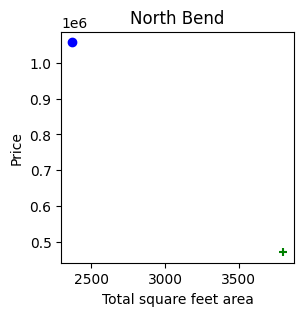

In [266]:
scatter_plot_city_bedroom(df7, 'North Bend', 2005)

Text(0, 0.5, 'Count')

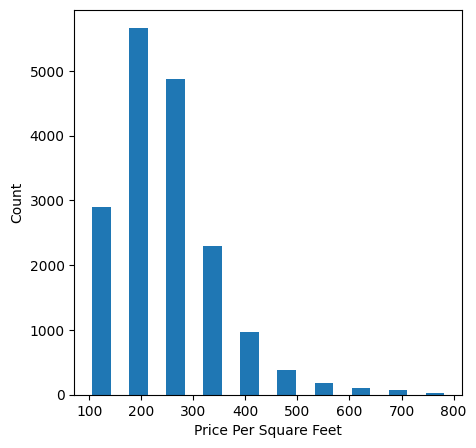

In [245]:
## histogram based on price per square feet
matplotlib.rcParams["figure.figsize"] = (5,5)
plt.hist(df7.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

1. Normally, in the same city, price of 3bedrooms house should be greater than 2bedrooms house with same year of built
2. But here we have some outliers were price of 3bedroooms is less than 2bedrooms.. so we are going to remove them.. 
3. To do that lets build a dictionary for a given city, for each year,which holds mean(pps), std(pps), count for each bed room category.
4. Filter the 2bedrooms whose price_per_sqft is less than the mean(pps) of 1bedroom of same year built and same city and so on

city_year_bed_dict
{
'2015': {
	'2' : {
	'mean':
	'std':
	'count':		
	}
	'3' : {
	'mean':
	'std':
	'count':		
	}
  },
'2014': {
	'2' : {
	'mean':
	'std':
	'count':		
	}
	'3' : {
	'mean':
	'std':
	'count':		
	}
  }
}

In [246]:
def remove_outliers_bed_pps(df):
    indices_tobe_removed = np.array([])
    for city, sub_df in df.groupby('city'):
        city_year_bed_dict = {}
        for year, year_df in sub_df.groupby('yr_built'):
            city_year_bed_dict[year] = {}
            for bed, bed_df in year_df.groupby('bedrooms'):
                city_year_bed_dict[year][bed] = {
                'mean': np.mean(bed_df.price_per_sqft),
                'std': np.std(bed_df.price_per_sqft),
                'count' : bed_df.shape[0]      
            }
        for year, year_df in sub_df.groupby('yr_built'):
            year_dict = city_year_bed_dict.get(year)
            for bed, bed_df in year_df.groupby('bedrooms'):
                prev_bed_stats = year_dict.get(bed-1)
                if prev_bed_stats:
                    indices_tobe_removed = np.append(indices_tobe_removed, bed_df[bed_df.price_per_sqft < (prev_bed_stats['mean'])].index.values)
                       
    return df.drop(indices_tobe_removed, axis='index')

In [268]:
df8 = remove_outliers_bed_pps(df7)
df8.head()

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft
2,Seattle,3,2.25,2100,1967,445000.0,211.904762
21,Seattle,4,1.75,2460,1961,790000.0,321.138211
22,Seattle,2,1.00,1120,1944,260000.0,232.142857
24,Seattle,4,3.75,3190,1999,1700000.0,532.915361
25,Seattle,6,3.00,3840,1949,612000.0,159.375000


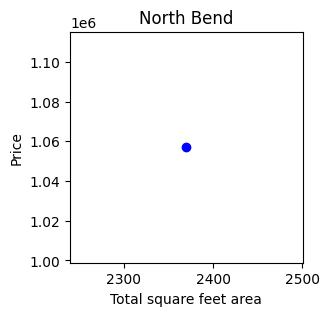

In [269]:
## This scatter plot gives the price distribution of 2bedrooms and 3bedrooms of a city after removing outliers
scatter_plot_city_bedroom(df8, 'North Bend', 2005)

In [270]:
df8.groupby('city')['city'].agg('count').sort_values(ascending=False)

city
Seattle          2105
Renton            784
Bellevue          699
Kent              663
Kirkland          547
Redmond           541
Auburn            502
Federal Way       461
Issaquah          419
Sammamish         357
Maple Valley      333
Woodinville       303
Mercer Island     181
Kenmore           181
Snoqualmie        165
Enumclaw          148
North Bend        148
Duvall            137
Bothell           128
Carnation          96
Vashon             72
Black Diamond      66
Fall City          59
Medina             45
Name: city, dtype: int64

1. Converting city column into number of dummy columns using get_dummies function of pandas
2. For every city name in "city" column, a new column is created with the same city name
3. Here we have 24 cities, so the function creates 24 different columns

In [272]:
df_city_columns = pd.get_dummies(df8.city)
df_city_columns

,Auburn,Bellevue,Black Diamond,Bothell,Carnation,Duvall,Enumclaw,Fall City,Federal Way,Issaquah,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21609,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21611,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [273]:
df_city_columns[df_city_columns.Auburn == 1]

,Auburn,Bellevue,Black Diamond,Bothell,Carnation,Duvall,Enumclaw,Fall City,Federal Way,Issaquah,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
5640,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5642,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5643,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5644,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5645,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10019,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10020,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10023,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10024,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
### concatenate original df with new location df
df9 = pd.concat([df8, df_city_columns], axis='columns')
df9

,city,bedrooms,bathrooms,sqft_living,yr_built,price,price_per_sqft,Auburn,Bellevue,Black Diamond,...,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon,Woodinville
2,Seattle,3,2.25,2100,1967,445000.0,211.904762,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21,Seattle,4,1.75,2460,1961,790000.0,321.138211,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22,Seattle,2,1.00,1120,1944,260000.0,232.142857,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24,Seattle,4,3.75,3190,1999,1700000.0,532.915361,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25,Seattle,6,3.00,3840,1949,612000.0,159.375000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,Medina,4,3.25,3990,1989,2720000.0,681.704261,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21609,Medina,4,3.50,4065,1987,1950000.0,479.704797,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,Medina,5,5.25,3410,2006,2250000.0,659.824047,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21611,Medina,5,4.00,5190,2013,2900000.0,558.766859,0,0,0,...,1,0,0,0,0,0,0,0,0,0


**Define Independent variables**

1. Define the independent variables by dropping unwanted columns 'city', 'price', 'price_per_sqft', 'Woodinville'.
2. When we use get_dummies function, we can remove one column because that column we can be determined when all other columns are equal to 1
3. When we are having n categories in the column, we can use n-1 individual columns
4. So we are dropping column name "Woodinville" here

In [276]:
X=df9.drop(['city', 'price', 'price_per_sqft', 'Woodinville'], axis='columns')
X.head()

,bedrooms,bathrooms,sqft_living,yr_built,Auburn,Bellevue,Black Diamond,Bothell,Carnation,Duvall,...,Maple Valley,Medina,Mercer Island,North Bend,Redmond,Renton,Sammamish,Seattle,Snoqualmie,Vashon
2,3,2.25,2100,1967,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21,4,1.75,2460,1961,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22,2,1.00,1120,1944,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,4,3.75,3190,1999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25,6,3.00,3840,1949,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [277]:
len(X)

9140

**Define Dependent variable**

We are going to predict house price when sqft_living, bathrooms, bedrooms, city , yr_built are given

In [278]:
y = df9.price
y.head()

2      445000.0
21     790000.0
22     260000.0
24    1700000.0
25     612000.0
Name: price, dtype: float64

In [279]:
len(y)

9140

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [287]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.7525794138079352

**Model Selection**

Best model is selected using GridSearchcv and k-fold

We are going to train our model with X_train, y_train using different regression algorithms. We use Linear Regression, Lasso, DecisionTree Regression and we also tune our model with hyperparameter tuning. For this we use Gridsearch

To split our Dataset into train and test, we use k-fold method and shufflesplit, where we specify number of splits


In [288]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
## shufflesplit splits the dataset into 5 different ways

cross_val_score(LinearRegression(), X, y, cv=cross_validation)
## cross_val_score trains the linear model with all different train datasets and gives the score


array([0.74734461, 0.73973206, 0.74347284, 0.76698925, 0.75830122])

In [289]:
## Now we are going to do the same thing with Gridsearchcv with different models and parameters to find the best model and parameter

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def find_best_regressor_model_using_gridsearch(X, y):
    
    algorithms = {
        'Linear_Regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }            
        },        
        'Lasso_Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2,3],
                'selection': ['random', 'cyclic']
            }            
        },        
        'Decision_Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']                
            }     
        }      
    }
    
    scores = []
    best_estimators = {}
    cross_validation = ShuffleSplit(n_splits=5, test_size=0.2)
    
    for algorithm, alg_config in algorithms.items():
        
        regressor_models = GridSearchCV(alg_config['model'], alg_config['params'], cv=cross_validation, return_train_score=False)
        regressor_models.fit(X,y)
        
        scores.append({
            'model':algorithm,
            'best_score':regressor_models.best_score_,
            'best_params':regressor_models.best_params_        
        })
        
        best_estimators[algorithm] = regressor_models.best_estimator_
        
    score_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params']) 
        
    return score_df, best_estimators   


In [290]:
score_df, best_estimators= find_best_regressor_model_using_gridsearch(X, y)

print(score_df)
print(best_estimators)

C:\Users\mohan\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\mohan\miniconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model

               model  best_score                                 best_params
0  Linear_Regression    0.751513                         {'normalize': True}
1   Lasso_Regression    0.747416         {'alpha': 1, 'selection': 'cyclic'}
2      Decision_Tree    0.668493  {'criterion': 'mse', 'splitter': 'random'}
{'Linear_Regression': LinearRegression(normalize=True), 'Lasso_Regression': Lasso(alpha=1), 'Decision_Tree': DecisionTreeRegressor(criterion='mse', splitter='random')}


C:\Users\mohan\miniconda3\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [291]:
best_regressor = best_estimators['Linear_Regression']
print(best_regressor)

LinearRegression(normalize=True)


In [312]:
def predict_house_price(city,sqft_living,bathrooms,bedrooms,yr_built):
    city_index=np.where(X.columns==city)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[1] = bathrooms
    x[2] = sqft_living
    x[3] = yr_built
    if city_index >= 0:
        x[city_index] = 1
        
    return best_regressor.predict([x])[0]

In [318]:
predict_house_price('Seattle',3190,3.75,4,1999)

C:\Users\mohan\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1087209.440782178

In [292]:
import pickle
with open('usa_house_price_model.pickle','wb') as f:
    pickle.dump(best_regressor,f)

In [293]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open("input_columns.json",'w') as f:
    json.dump(columns,f)

In [294]:
import json
columns={
    'city_names': [col.lower() for col in df_city_columns.columns]
}
with open("city_names.json",'w') as f:
    json.dump(columns,f)